Please fill in your name and that of your teammate.

You: Bhargav Solanki

Teammate: Carmen Sangro Prieto

# Introduction

Welcome to the tenth lab. Neural networks are more a class of tools than a single tool, though the foundation you built last week should enable you to understand what is going on here without too much trouble.

There is relatively little coding this week, which is unfortunate: we are starting to touch topics that require more than a lab's worth of practice to achieve basic proficiency. Rather than overloading you of work, this week we focus a bit more on foundations and give you time to study; then we should hit more interesting and fun applications over the next lectures with Deep Learning and Reinforcement Learning.

### How to pass the lab?

Below you find the exercise questions. Each question awarding points is numbered and states the number of points like this: **[0pt]**. To answer a question, fill the cell below with your answer (markdown for text, code for implementation). Incorrect or incomplete answers are in principle worth 0 points: to assign partial reward is only up to teacher discretion. Over-complete answers do not award extra points (though they are appreciated and will be kept under consideration). Save your work frequently! (`ctrl+s`)

**You need at least 14 points (out of 21 available) to pass** (66%).

# 1. Fundamentals

#### 1.1 **[1pt]** Explain in English what is the distinctive feature of a residual network.

As opposed to feed forward neural networks, which is directed acyclic  fully connected graph. A residual NN is when graph is not fully connected and actually some connections across layers are skipped. 

#### 1.2 **[2pt]** Write the full equation of a network with structure [2, 4, 1] (same as last week), but this time add (i) biases on all neurons, and (ii) self-recurrent connections only on the hidden layer. How many weights does this network have?

- I would suggest starting from your answer from last week, fixing it based on the solution if you need to and have not already, then add what you need.
- To avoid changing the indices of the weights, you can simply call bias weights $b$ rather than $w$, and recurrent connections $r$.
- The main thing to remember is: each line has the weights entering one destination neuron, and each column refers to one of the inputs to the layer.
- Then for a recurrent network, remember to pass the output of all neurons of the same layer (technically representing the previous-step activations, initialized as `0`s) as inputs to each neuron.

The network has three layers:
- An input layer (no neurons!) with two elements $(x_1, x_2)$
- One hidden layer composed of four neurons $(n_1, n_2, n_3, n_4)$
- The output layer with only one neuron $(n_5)$

We will need to add biases and recurrencies this time: it could be helpful to describe the inputs/outputs for each layer together with the weight matrix. 
- $X$ is the network input, same as before
- Then come the recurrent connections: all the outputs of the neurons of the hidden layer, technically from the previous time step (initialize as zeros)
- Finally the bias input, the constant 1 that will be multiplied by the bias weight
- $X_{hid}$ is the actual full input to the hidden (and first) layer: all three above
- $W_h$ is the weight matrix for ALL the connections entering the hidden layer in the columns, while the rows group the connections entering each neuron
- The output can be written with $n_i$ same as we did last time; the don't forget you will need the bias also for the output layer (but no recursion!)
- You can call $X_{out}$ the input to the output (and second) layer, and $W_{out}$ its weight matrix.
And do not underestimate the value of a quick sketch on a piece of paper! Or head to [draw.io](https://draw.io) if you want a computer drawing that is easy, quick and professional looking.

Remember that the output can be interpreted as one scalar, but is in principle a vector with one element (because having only one output is a special case, normally you need a list of outputs here).


##### The inputs are :

$$
x = \begin{pmatrix}
x_1\\
x_2
\end{pmatrix}
$$
##### The number of neurons is :
$$
n_{hid} = \begin{pmatrix}
n_1\\
n_2\\
n_3\\
n_4
\end{pmatrix}
$$
##### The Biases are:
$$
b = \begin{pmatrix}
b_1\\
b_2\\
b_3\\
b_4\\
b_5
\end{pmatrix}
$$
##### The Weights for hidden neuron's output that go as input are:
$$
r = \begin{pmatrix}
r_{11}\\
r_{12}\\
r_{13}\\
r_{14}\\
r_{21}\\
r_{22}\\
r_{23}\\
r_{24}\\
r_{31}\\
r_{32}\\
r_{33}\\
r_{34}\\
r_{41}\\
r_{42}\\
r_{43}\\
r_{44}
\end{pmatrix}
$$
##### The outputs of hidden layers at time (t-1):
$$
n = \begin{pmatrix}
n_1^{t-1}\\
n_2^{t-1}\\
n_3^{t-1}\\
n_4^{t-1}
\end{pmatrix}
$$
##### We have layer 1 weights as :
$$
W_{in}
= \begin{bmatrix}
w_1 & w2\\ 
w_3 & w_4\\
w_5 & w6\\
w_7 & w8
\end{bmatrix}
$$

##### We have hidden weights as :
$$
W_{hid}
= \begin{bmatrix}
w_9 & w_{10} & w_{11} & w_{12}
\end{bmatrix}
$$

##### The output neuron is :
$$
n_{out} = \begin{pmatrix}
n_5
\end{pmatrix}
$$
##### The act equation for [2,4,1] is :
$$
= \sigma [\\
w_9 \sigma(w_1.x_1^{t} + w_2.x_2^{t} + r_{11}.n_1^{t-1}+ r_{12}.n_2^{t-1}+ r_{13}.n_3^{t-1}+ r_{14}.n_4^{t-1} + 1.b_1 )\\
+ \\
w_{10} \sigma(w_3.x_1^{t} + w_4.x_2^{t} + r_{21}.n_1^{t-1}+ r_{22}.n_2^{t-1}+ r_{23}.n_3^{t-1}+ r_{24}.n_4^{t-1} + 1.b_2)\\
+ \\
w_{11} \sigma(w_5.x_1^{t}+ w_6.x_2^{t} + r_{31}.n_1^{t-1}+ r_{32}.n_2^{t-1}+ r_{33}.n_3^{t-1}+ r_{34}.n_4^{t-1} + 1.b_3)\\
+\\
w_{12} \sigma(w_7.x_1^{t} + w_8.x_2^{t}+ r_{41}.n_1^{t-1}+ r_{42}.n_2^{t-1}+ r_{43}.n_3^{t-1}+ r_{44}.n_4^{t-1} + 1.b_4)\\
+\\
1.b_5
]
$$

##### The total number of weights are 8 weights for each hidden neuron, i.e 2 from inputs, 1 weight of bias and 4 for recurrence times 4 ( number of neurons) so 28 for the hidden layer. Plus 4 weights to output nueron from the hidden layer input plus a weight bias. So 28 + 4 + 1 = 33

#### 1.3 **[2pt]** A neural network has only one layer of two convolutional neurons with identity activation. Below you will find respective kernels $W_1$ and $W_2$ and input $X$. Activate the network on the input by hand showing all calculation. Assume no padding and state explicitly the expected output size.

It's easier to understand what you need to explain about your calculations if you actually start doing them :) just mark what you actually input in the calculator, what the calculator returns, and what calculation you are confident skipping.

$$
W_1 = 
\begin{pmatrix}
-1 & 1 & -1 \\
-1 & 1 & -1 \\
-1 & 1 & -1
\end{pmatrix}
\quad,\quad
W_2 = 
\begin{pmatrix}
-1 & -1 & -1 \\
 1 &  1 &  1 \\
-1 & -1 & -1
\end{pmatrix}
\\
X = 
\begin{pmatrix}
2 & 3 & 1 & 3 & 2 \\
2 & 3 & 1 & 3 & 2 \\
2 & 3 & 1 & 3 & 2 \\
2 & 3 & 1 & 3 & 2 \\
2 & 3 & 1 & 3 & 2 \\
\end{pmatrix}
$$

In [12]:
# It was too much work to do the calculations. I wrote a script to show the calculations.
# If you run this code, it will show the output printed.Step by step.
def helper(w,x):
    res = []
    for row_x in range(0, len(x)- len(w)+1):
        masks = []
        for col_x in range(0, len(x[row_x])- len(w[0])+1):
            total_mask = 0
            print("Mask starting ", row_x, col_x)
            for i in range(0, len(w)):
                for j in range(0, len(w[0])):
                    val = w[i][j]* x[row_x+i][col_x+j]
                    print(""+str(w[i][j])+"x"+ str(x[row_x+i][col_x+j]) + " = " ,val )
                    total_mask += val
            print("Total is =", total_mask )
            masks.append(total_mask)
        res.append(masks)
    return res
            
w1 = [[-1, 1, -1],[-1, 1, -1], [-1, 1, -1]]
w2 = [[-1, -1, -1], [1,1,1], [-1, -1,-1]]
x = [[2,3,1,3,2],[2,3,1,3,2],[2,3,1,3,2],[2,3,1,3,2],[2,3,1,3,2]]
kernal1 = helper(w1,x)
print("Output for W1 = ", kernal1)
kernal2 = helper(w2, x)
print("Output for W2 = ", kernal2)

Mask starting  0 0
-1x2 =  -2
1x3 =  3
-1x1 =  -1
-1x2 =  -2
1x3 =  3
-1x1 =  -1
-1x2 =  -2
1x3 =  3
-1x1 =  -1
Total is = 0
Mask starting  0 1
-1x3 =  -3
1x1 =  1
-1x3 =  -3
-1x3 =  -3
1x1 =  1
-1x3 =  -3
-1x3 =  -3
1x1 =  1
-1x3 =  -3
Total is = -15
Mask starting  0 2
-1x1 =  -1
1x3 =  3
-1x2 =  -2
-1x1 =  -1
1x3 =  3
-1x2 =  -2
-1x1 =  -1
1x3 =  3
-1x2 =  -2
Total is = 0
Mask starting  1 0
-1x2 =  -2
1x3 =  3
-1x1 =  -1
-1x2 =  -2
1x3 =  3
-1x1 =  -1
-1x2 =  -2
1x3 =  3
-1x1 =  -1
Total is = 0
Mask starting  1 1
-1x3 =  -3
1x1 =  1
-1x3 =  -3
-1x3 =  -3
1x1 =  1
-1x3 =  -3
-1x3 =  -3
1x1 =  1
-1x3 =  -3
Total is = -15
Mask starting  1 2
-1x1 =  -1
1x3 =  3
-1x2 =  -2
-1x1 =  -1
1x3 =  3
-1x2 =  -2
-1x1 =  -1
1x3 =  3
-1x2 =  -2
Total is = 0
Mask starting  2 0
-1x2 =  -2
1x3 =  3
-1x1 =  -1
-1x2 =  -2
1x3 =  3
-1x1 =  -1
-1x2 =  -2
1x3 =  3
-1x1 =  -1
Total is = 0
Mask starting  2 1
-1x3 =  -3
1x1 =  1
-1x3 =  -3
-1x3 =  -3
1x1 =  1
-1x3 =  -3
-1x3 =  -3
1x1 =  1
-1x3 =  -3
Total is 

#### 1.4 **[2pt]** Look at the activations of the two neurons from 1.3 and discuss why they are so different. Explain in particular the regularities both in the inputs and in the kernels. Then go one step further and explain, to the best of your understanding, which types of features are detected by the two kernels.

- This is another open question: as long as you do not write anything wrong, while showing competence and intuition, you will get the points.
- Hint: focus on thinking about the _patterns_ that you can see by eye both in the data matrix and in the kernels. Try to go for an intuitive answer.

W1 is ttrying to extract features from columns by assigning centre column poisitve weights (1,1,1) in the centre column. And w2 focuses on extracting features from the rows, specifically the centre row of the wieghts in the kernal is giving positive weights to the rows. They are both similar in the sense that feature to be focused is either column or rows. So, as per my understanding, w1 will pick up vertical features and w2 will pick up horizontal features.

#### 1.5 **[1pt]** Activate a $3x3$ max pooling layer on the outputs of the two convolutions from your answer to question 1.3. Assume again no padding.

Applying max pooling on output of w1 with x
kernal1 =  [[0, -15, 0], [0, -15, 0], [0, -15, 0]]
this is a 3 x 3 matrix and so is our max pooling. Hence, the result is max(0, -15, 0, 0, -15, 0,0, -15, 0) = 0
Applying max pooling on output of w2 with x
kernal1 =  [[-6, -7, -6], [-6, -7, -6], [-6, -7, -6]]
this is a 3 x 3 matrix and so is our max pooling. Hence, the result is max(-6, -7, -6, -6, -7, -6,-6, -7, -6) = -6


#### 1.6 **[1pt]** Explain in one sentence what is an autoencoder. Why do autoencoders have an hourglass shape? Could you design an autoencoder with a different shape?

Autoencoder takes in a set of inputs and reduces the deimesnionality of the input. So for example, if you give 5 inputs, it will apply a neural network and give an output in the output layer with a vector length of 2. So dimensionality reduced from 5 to 2 in this example. Now , decoder will take in these two inputs and try to produce the original output. In our example, the output of our encoder of vector length 2 is given as an input to the decoder, which is again a NN, and then results in a output of lenght 5, trying to get the same values as input. It looks like a hour glass because, 
High dimensions as input , reduced dimensions in the middle, and then same number of high deimensions in the output. 

# 2. Recurrent Neural Networks

#### 2.1 **[4pt]** Below is last week's implementation of a neural network augmented into a fully-connected RNN with bias connections. Fix it by writing the missing code as marked by `?`.

- Unless otherwise stated, a RNN has fully-connected self-recurrent connections on each layer.
- You should know exactly which connections to add if you answered the RNN question in the fundamentals.
- For the bias: remember that you need all elements in `state` to be longer by one element: put actual `1`s in these last positions at initialization, then never touch them again.
- Recurrencies: you need to make space in the input to each layer for its own output. I typically sort them as [input, recurrencies, bias], but order is not important: consistency is. Make sure all your sizes are correct.
- When calculating the size of an input now you need to use `struct` twice: once for the size of the layer entering (something like `struct[nlay]`) and once for the size of the output that goes back as input in the recursion (hence `struct[nlay+1]`). HINT: to make the pairs for each layer execute and understand the following: `zip(struct, struct[1:])`
- When you activate a layer remember to copy the activation to both (i) its output and (ii) its input, at the correct indices.
- It's easier to compute the size of each input beforehand, then use it to make the `state` list. Then for each weight matrix you can take the number of rows from the structure (as before), and the number of inputs from the `state` sizes.  Don't worry about duplicating the activation in the layer's input, it's actually faster because you have a ready numpy array rather than composing at activation.
- Remember to initialize the recurrent output to `0`. Simplest way is to initialize `state` using `np.zeros()` instead of `np.empty()`. Then set the last value of each `state` element to `1` for the bias.
- I used myself `import IPython; IPython.embed()` heavily to get this to work. You can also call (once!) `%pdb` to drop in the debugger on error. Keep calm and check the dimensions.
- The layer activation function should change because you are saving the activation to two locations (and at specific indices, not direct substitution like before), but the network activation function should change just marginally (add indices to insert input in state)
- To _convolve_ with stride 1 and no padding a window of size two on a 1D list (take a pair at a time, advance by one) in Python you can use `zip(lst, lst[1:])`.
- This question only refers to neural networks, not learning algorithm, so leave backpropagation out and do not worry about unrolling the network.
- Again activate it on a simple input to verify everything is works. The input should be exactly the same as last week's (as the network architecture).
- Think: how many weights do you expect to have? Remember that you have 3 matrices (for the 3 layers of neurons), in each the number of rows is unchanged (because you have one per each neuron) but the inputs now are not only connections from the previous layer, you also have recursion (take the output of this layer as its own input) and bias (constant 1 appended to the inputs).
<!-- Secret hint: my tally is (4+3+1)*3 + (3+4+1)*4 + (4+3+1)*3 -->

In [128]:
import math
import numpy as np
class RecurrentNeuralNetwork:
    def __init__(self, struct):
        # These are basic, copy+paste from FFNN
        self.struct = struct
        self.nlayers = len(self.struct)
        self.nins, *self.hidden, self.nouts = self.struct
        self.sigma = lambda x: ( 1 / (1 + np.exp(-x)))
        # Each `state` is an input for next layer: it now includes rec and bias
        state_sizes = [inp+1+rec for inp, rec in zip(self.struct, self.struct[1:])]
        # Notice the `zip` above ends when the second list reaches the end (1 shorter)
        # Last `state` is only the output of the last layer (no rec/b)
        state_sizes += [self.nouts]
        # We can now build the state of the network
        temp_state = []
        for size in state_sizes:
            temp_state.append([0]*size)
        self.state = np.array(temp_state)
        #print(self.state)
        # We will need to access inputs and recurrencies by index: the following helps
        self.inp_idxs = [range(0, val) for val in self.struct]
        #self.inp_idxs = np.array([range(0, val) for val in self.struct])
        self.rec_idxs = [range(s, s+end) for s, end in zip(self.struct, self.struct[1:])]
        #print(self.rec_idxs)
        # Finally, fix the bias input in the last position of all input `state`s
        # Just set and forget, and no need for indices because we won't access it again
        for s in self.state: s[-1] = 1
        #print(self.struct[1:], self.struct)    
        # The `state` sizes now correspond to the row lengths (ncols) for the weight matrices
        self.wsizes = [[row, col+row+1] for row, col in zip(self.struct[1:], self.struct)]
        # Finally: weight initialization. Bad practice to hardcode this, but ok here
        self.weights = [np.random.normal(size=ws) for ws in self.wsizes]
        #print(self.weights)

    # The layer activation is unchanged: sigma(W.dot(X)) -- only W and X (=state) differ
    def act_layer(self, nlay):
        #print("For layer =",nlay,"val is " , self.weights[nlay].dot(self.state [nlay]))
        return self.sigma(self.weights[nlay].dot(self.state [nlay]))

    # The network activation only writes the act twice this time: output & rec-input
    def act_net(self, inp):
        assert len(inp) == self.nins, f"got input `{inp}`, expected np.array of length `{self.nins}`"
        #print(self.state[0], inp)
        zeroth = [val for val in self.inp_idxs[0]]
        for i in range(0, len(zeroth)):
            val = zeroth[i]
            self.state[0][val] = inp[i]
        #self.state[0][self.inp_idxs[0]] = inp
        for nlay in range(self.nlayers-1):
            act = self.act_layer(nlay)
            #print("Output = ", act)
            # This time the layer activation goes in two places:
            # - In the input indices of the output of this layer / input to next
            temp = []
            for val in self.inp_idxs[nlay+1]:
                temp.append(val)
            #    self.state[nlay][val] = act[]
            # - In the recurrent indices of the input to this layer
            #for val in self.rec_idxs[nlay]:
            temp1 = [val for val in self.inp_idxs[nlay+1]]
            for i in range(0, len(temp1)):
                val = temp1[i]
                self.state[nlay+1][val] = act[i]
            #self.state[nlay][self.inp_idxs[nlay+1]] = act
            temp1 = [val for val in self.rec_idxs[nlay]]
            for i in range(0, len(temp1)):
                val = temp1[i]
                self.state[nlay][val] = act[i]
            #self.state[nlay+1][self.rec_idxs[nlay]] = act
        return self.state[-1]


In [129]:
struct = [4,5,4,3]
#struct = [2, 4, 1]
inputs = [3,2,4,3]
#inputs = [2,4]
net = RecurrentNeuralNetwork(struct)
# We expect the activation to change this time upon multiple calls on the same input
# This is because the `state` of the RNN is maintained in the recurrent connections
print("activation 1:", net.act_net(np.array(inputs)))
print("activation 2:", net.act_net(np.array(inputs)))
print("activation 3:", net.act_net(np.array(inputs)))

activation 1: [0.2615155648876883, 0.9132859193763553, 0.19136407060168362]
activation 2: [0.2819070270928628, 0.9113427021661625, 0.13965234932150672]
activation 3: [0.31739349703632463, 0.8951336001767031, 0.18966439891906361]


/var/folders/42/w2l564n124q9v61h6kxcz3tm0000gn/T/ipykernel_9772/2854630062.py:19: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  self.state = np.array(temp_state)


# 3. Convolutional Networks

#### 1.1 **[2pt]** Write a Python function for 2D convolution, then run it on a randomly generated input matrix and show the output.

- You need to write a function that takes a 2D input and a function to convolve as parameters, then convolves the function over the inputs to produce the output.
- The window size is not specified: you can use a 3x3 to keep it simple since you saw that in the examples.
- The function to convolve is not specified: no need for it to be a neural network, something as simple as `sum` or a quick lambda calling the numpy `x.sum()` would work perfectly well. Remember that the important part is that it should take a high-dimensional (3x3?) input and output only one value.
- The size of the input matrix is not specified: with a 3x3 mask we could go as small as 5x5 with no padding and that would still show that the convolution works.
- Then remember: the neural networks are just other functions than `sum`, but behave exactly the same way. Convolving a neural network only allows you to learn the function rather than hardcoding it, but the convolution process is independent.
- Answer the question until the end: show that you know how to create a matrix of random numbers, and of the right size.

In [14]:
import numpy as np

#function to create the slices
def create_slices(matrix, slice_x, slice_y):
    width = len(matrix[0])
    height = len(matrix)
    slices = []
    for i in range(0, height - slice_y + 1):
        for j in range(0, width - slice_x + 1):
            slices.append(
                [
                    [matrix[a][b] for b in range(j, j + slice_x)]
                    for a in range(i, i + slice_y)
                ]
            )
            
    return slices


def convolution(x, k):
    
    #create final matrix
    k_shape = k.shape
    final_matrix = np.zeros((k.shape), dtype="int")
    
    #sizes of the slices
    slice_x = k.shape[0]
    slice_y = k.shape[0]
    
    #call slices function
    slices = create_slices(x, slice_x, slice_y)
    
    #iterate over every slice
    list_slices = []
    for sl in slices:
        list_slices.append((sl*k).sum())
   
    calculated = []
    while list_slices != []:
        calculated.append(list_slices[:len(final_matrix)])
        list_slices = list_slices[len(final_matrix):]

    for i in range(len(final_matrix)):
        for j in range(len(final_matrix)):
            final_matrix[i][j] = calculated[i][j]
            
    return final_matrix
prueba = np.array([[1,2,3], [4,5,6], [7,8,9]])
two = np.full((2,2),1)
convolution(prueba, two)

array([[12, 16],
       [24, 28]])

In [131]:
import numpy as np
def convolution_helper(w,x, convolve):
    res = []
    for row_x in range(0, len(x)- len(w)+1):
        masks = []
        for col_x in range(0, len(x[row_x])- len(w[0])+1):
            total_mask = []
            print("Mask starting ", row_x, col_x)
            for i in range(0, len(w)):
                for j in range(0, len(w[0])):
                    val = w[i][j]* x[row_x+i][col_x+j]
                    #print(""+str(w[i][j])+"x"+ str(x[row_x+i][col_x+j]) + " = " ,val )
                    total_mask.append( val)
                
            #print("Total is =", total_mask )
            # applying convolution
            temp = convolve(total_mask)
            masks.append(temp)
            
        res.append(masks)
    return res
w1 = [[-1, -1, -1], [1,1,1], [-1, -1,-1]]
x = [[2,3,1,3,2],[2,3,1,3,2],[2,3,1,3,2],[2,3,1,3,2],[2,3,1,3,2]]
# here np.sum is my convolution
kernal1 = convolution_helper(w1,x, np.sum)
print("convolution is ", kernal1)
random_x = np.random.rand(5,5)
random_weights = np.random.rand(3,3)
kernal2 = convolution_helper(random_weights,random_x, np.sum)
print("convolution is ", kernal2)

Mask starting  0 0
Mask starting  0 1
Mask starting  0 2
Mask starting  1 0
Mask starting  1 1
Mask starting  1 2
Mask starting  2 0
Mask starting  2 1
Mask starting  2 2
convolution is  [[-6, -7, -6], [-6, -7, -6], [-6, -7, -6]]
Mask starting  0 0
Mask starting  0 1
Mask starting  0 2
Mask starting  1 0
Mask starting  1 1
Mask starting  1 2
Mask starting  2 0
Mask starting  2 1
Mask starting  2 2
convolution is  [[2.6474025054452777, 3.0679413892412755, 3.4980944193745924], [3.841590679065327, 3.433079687685648, 3.5546115117613963], [3.503468758614041, 2.908808701859149, 2.824469740208538]]


# 4. Handwritten digit recognition with Keras

As mentioned at the beginning, we need to cross a gap in exercise complexity. On one hand you are ready to understand the inner work of a DL library like Keras, on the other asking you for such a task on top of today's lecture is too much even for this course :) So let's leave the creative part for next weeks, where we will see some more advanced applications anyway, and focus today on what we learned and on a new skill: how to justify your code.

Below is a tutorial from the Keras website on convolutional networks [[source]](https://keras.io/examples/vision/mnist_convnet/). It uses the [MNIST dataset](https://en.wikipedia.org/wiki/MNIST_database), a standard dataset for handwritten character recognition. Keras offers you a backend to automatically download the dataset, similarly to what we did so far with Seaborn and Iris.

The code should work as is (did you `pipenv install tensorflow keras`?), but take a while to run. Read it line by line, really study and understand it, feel free to change it so that it runs in few seconds if you wish to play with it; then answer the questions below.

NOTE: you don't need to run the code to answer any of the questions below. If you used PyTorch at the last lecture, this is your chance to try out Keras. If you cannot (looking at you M1 users), you can use Colab for this assignment, or replace the Keras tutorial with a PyTorch equivalent [such as this](https://pythonguides.com/pytorch-mnist/). This only affects 4.3, while 4.1 and 4.2 should be fine.

In [132]:
"""
Title: Simple MNIST convnet
Author: [fchollet](https://twitter.com/fchollet)
Date created: 2015/06/19
Last modified: 2020/04/21
Description: A simple convnet that achieves ~99% test accuracy on MNIST.
SOURCE: https://github.com/keras-team/keras-io/blob/master/examples/vision/mnist_convnet.py
"""

"""
## Setup
"""
print("Hello")
import numpy as np
from tensorflow import keras
from tensorflow.keras import layers

"""
## Prepare the data
"""

# Model / data parameters
num_classes = 10
input_shape = (28, 28, 1)

# the data, split between train and test sets
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

# Scale images to the [0, 1] range
x_train = x_train.astype("float32") / 255
x_test = x_test.astype("float32") / 255
# Make sure images have shape (28, 28, 1)
x_train = np.expand_dims(x_train, -1)
x_test = np.expand_dims(x_test, -1)
print("x_train shape:", x_train.shape)
print(x_train.shape[0], "train samples")
print(x_test.shape[0], "test samples")


# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

"""
## Build the model
"""

model = keras.Sequential(
    [
        keras.Input(shape=input_shape),
        layers.Conv2D(32, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Conv2D(64, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Flatten(),
        layers.Dropout(0.5),
        layers.Dense(num_classes, activation="softmax"),
    ]
)

model.summary()

"""
## Train the model
"""

batch_size = 128
epochs = 15

model.compile(
    loss="categorical_crossentropy",
    optimizer="adam",
    metrics=["accuracy"])

history = model.fit(
    x_train, y_train,
    batch_size=batch_size,
    epochs=epochs,
    validation_split=0.1)

"""
## Evaluate the trained model
"""

score = model.evaluate(x_test, y_test, verbose=0)
print("Test loss:", score[0])
print("Test accuracy:", score[1])

Hello
x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples
Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 13, 13, 32)       0         
 2D)                                                             
                                                                 
 conv2d_3 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 1600)              0         
                                         

#### 4.1 **[1pt]** Data plotting: plot the first 9 images in MNIST using a 6x6 subplot.

Let's first see what the MNIST looks like. I showed how to use subplots in a recent solution -- do you remember where it was? You'll need the ability to search quickly for what you need to complete the exam in time. Try timing how long it takes you to answer this question (no seriously challenge your teammate on who solves this the quickest and feel free to brag about it in your solution below).
- Add the label on the title to see how the numbers are represented: do you see the connection to last week's `species`?
- After you obtain the axis from `plt.subplots()`, you can print a 2D image using `ax[?,?].imshow()`

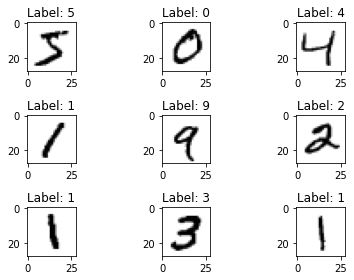

In [134]:
%matplotlib inline
import matplotlib.pyplot as plt

# load data again
(x_train2, y_train2), (x_test2, y_test2) = keras.datasets.mnist.load_data()

# select first 9 images
images = x_train2[:9]
labels = y_train2[:9]

# plot images
fig, axes = plt.subplots(3,3)
for i in range(9):
    ax = axes[i//3, i%3]
    ax.imshow(images[i], cmap='gray_r')
    ax.set_title('Label: {}'.format(labels[i]))
plt.tight_layout()
plt.show()

#### 4.2 **[3pt]** Explain the following lines in the Keras MNIST Tutorial code (in English): 27, 48, 51, 52, 67, 68

- To answer this question you need to show complete competence, as if you wrote this code yourself and you were asked to explain your choices at an oral exam.
- For each of the lines mentioned, check the code provided and explain it thoroughly
- For each variable, explain its meaning, its use, and the choice of value assigned
- For each function call, explain what it does, the meaning of all parameters, and the choices of all values.
- Reading the code like "assign 12 to variable `epochs`" will not constitute an acceptable answer.
- Reading the code like "creates a new Sequential" is also not acceptable: check the documentation for `Sequential`, understand what the call does, and present your findings.

1) Line 27: we are **loading the MNIST dataset** from the Keras library and assigning its different components to different variables i.e. since there exists a training and a test dataset, we are differetiating both, and also selecting the x and y values respectively.

2) Line 48: we are creating our **model**, by calling the Keras class "sequential", which basically groups a linear stack of layers, and we pass a series of arguments.

3) Line 51: we are performing **2D convolution**, where 32 is the dimensionality of the output space; we are using a kernel of size 3x3 and we're also using the rectified linear unit activation function.

4) Line 52: we're conveying a **max-pooling** that returns an output of size 2x2. Basically, the max-pooling neuron outputs the maximum of its inputs over its receptive field.

5) Line 67: we're establishing a **batch size** of 64 (originally 128). The batch size is a hyperparameter that defines the number of samples that are going to be propagated through the network.

6) Line 68: we're establishing 6 (originally 15) **epochs**. The epochs are a hyperparameter that states the number of times that the algorithm will work through the entire training dataset.

#### 4.3 **[2pt]** Tweak the variables in the Keras MNIST code to be able to run it in a decent time. Performance plotting: plot the model's accuracy and loss over time.

- This is almost for free since you did the same visualization last week, but you need to get the code to run first.
- Also you may want to make sure your changes include setting 'accuracy' and the `history` variable, or at the end of the run you could end up with still nothing to show :)

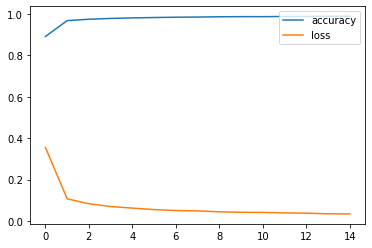

In [135]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['loss'])
plt.legend(['accuracy', 'loss'], loc='upper right')

# At the end of the exercise

Bonus question with no points! Answering this will have no influence on your scoring, not at the assignment and not towards the exam score -- really feel free to ignore it with no consequence. But solving it will reward you with skills that will make the next lectures easier, give you real applications, and will be good practice towards the exam.

The solution for this questions will not be included in the regular lab solutions pdf, but you are welcome to open a discussion on the Moodle: we will support your addressing it, and you may meet other students that choose to solve this, and find a teammate for the next assignment that is willing to do things for fun and not only for score :)

#### BONUS **[ZERO pt]** Edit the Keras MNIST code to use a simple RNN, then cheat by passing all images of a class in a sequence (careful with batch size). Reset the network between classes. RNNs will recognize that you expect a constant output per each sequence, decide which output with the first few images, then just saturate the right neurons using the recurrent connections to generate a constant output regardless of the input. You can verify this by then testing the network on a sequence of elements from a constant class, followed by one (or more) elements from another class: they will likely be misclassified. All intelligent learning picks up on shortcuts whenever available, here is a famous example (check the full paper): [husky vs. wolf](https://www.researchgate.net/figure/A-husky-on-the-left-is-confused-with-a-wolf-because-the-pixels-on-the-right_fig1_329277474). Notice that getting a "simple" RNN in Keras is not straightforward, and we will see LSTMs next week.

### Final considerations

- At the end of this lecture + exercise you should _own_ neural networks. It does not mean that you know everything about them, but you have enough to learn from any resource you can find, and you actually know how these things work better than most people who just use Keras/Pytorch on a daily basis (unfortunately).
- Try to get the original Keras MNIST code to work on GPUs/TPUs using Colab and get a first feel of the speed boost from specialized hardware that we will present next week.